# A/B Testing - Final Project

### Leandro Corrêa Gonçalves

## Metric Choice

As mentioned in the problem statement, the hypothesis was that this feature might set clearer expectations for students upfront, thus reducing the number of frustrated students who left the free trial because they didn't have enough time—without significantly reducing the number of students to continue past the free trial and eventually complete the course. If this hypothesis held true, Udacity could improve the overall student experience and improve coaches' capacity to support students who are likely to complete the course.

### So what are the best metrics to measure this effect?

* **gross conversion:** Users enrolled in 14 free trial / Number of unique cookies that clicked on the Start Free button. It is expected to be lower in the experimental group as the new feature is trying to filter only users that really have time available to complete the whole course, thus fewer users would be willing to enroll in the free trial rather than go to the course materials

* **net conversion:** Users that paid for the course (remained enrolled after 14-free-trial) / Number of unique cookies that clicked on the Start Free button. As the gross conversion is expected to be lower in the experimental group, this metric can also be affected for this new feature cause it is like a funnel that we have people enrolled in the free-trial (gross conversion) and from all these people there are fewer people that continue to the paid version.

* **retention:**: This is a good metric to keep track and it should be higher in the experimental group if the hypothesis of users that have the suggested available time are more likely to complete the course is true.


### What about the Invariant Metrics (that is, the ones that should not be significant different among the groups)

* **Number of cookies (pageviews):** This is the experiment's `unity of diversion` so we have to be sure that they are evenly distributed between the groups.

* **Number of clicks:**: It should not be changed with the new feature and can be used as invariant metric in our sanity check.

* **click-through-probability:** This is the above metrics divided by each other and also should not be any different for both control and experimental group.

## Measuring Variability

For each evaluation metric defined, it is possible to estimate their standard deviation analytically and have a good start point knowing the metrics variability.

Depeding on the metric's distribution, the analytical estimates can be less accurate than an empirical estimate. So it is important to explore a little bit your data to have a good intuition about the distribution assumptions.

Udacity provided the table below with useful assumptions of the distributions depending on the metric type

<table align="left">
<tr><td><b>Type of metric</b></td><td><b>Distribution</b></td><td><b>Estimated Variance</b></td></tr>
<tr><td>Probability </td><td>Binomial (normal)</td><td> $\frac{\hat{p}(1-\hat(p)}{N}$ </td></tr>
<tr><td> Mean </td><td>Normal</td><td> $\frac{\sigma^2}{N}$</td></tr>
<tr><td>Median/percentile</td><td>depends</td><td>depends</td>
<tr><td>Count/Difference</td><td>Normal(maybe)</td><td>Var(X) + Var(Y)</td>
<tr><td>Rates</td><td>Poisson</td><td>$\bar{x}$</td>
<tr><td>Ratios</td><td>depends</td><td>depends</td>
</table>

It is also import to account to `Sensitivity` and `Robustness` of the chosen metric(s)  

##### Is my metric sensitive enough to capture differences when they actually exist?

##### What about when there is no difference? It is robust enough to not be easily changed?

Here are some baseline values provided to this project:

* Unique cookies to view course overview page per day: 40000
* Unique cookies to click "Start free trial" per day: 3200
* Enrollments per day: 660
* Click-through-probability on "Start free trial": 0.08
* Probability of enrolling, given click: 0.20625
* Probability of payment, given enroll:	0.53
* Probability of payment, given click: 0.1093125

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
baseline_values = {'cookies_per_day': 40000,
                   'cookies_click_button': 3200,
                   'enrollments_per_day': 660,
                   'CTP': 0.08,
                   'p(enroll,click)': 0.20625,
                   'p(payment,enroll)': 0.53,
                   'p(payment,click)': 0.1093125}

### Analytical / Theoretical estimates

Using the baseline values provided we can estimate some analytical references for the data and use these estimates as a baseline of variability

### Metric 01 - Gross Conversion

As it is a rate calculation it might be a good assumption that it follows a Binomial Distribution and this is an important information because we can use the distribution's formulas to estimate the variability of this metric (Standard Error in this case) which is: 

## $\sqrt{\frac{p(1-p)}{N}}$

From the baseline values the probability of users enroll given they clicked on Start Free button is:

### P ( enroll | click) = 0.20625

It is still missing an information to calculate the analytical variability: The **N** parameter. Udacity required an estimation for 5000 pageviews that needs to be transformed using the baseline values

in other words as we have 40K cookies per day and 3200 clicks per day, how would it be transformed to a 5K pageviews per day?

In [3]:
N_gross = (baseline_values['cookies_click_button'] / baseline_values['cookies_per_day']) * 5000

print(f"Keeping the same proportion we would have {N_gross} cookies for a sample of 5000 pageviews")

Keeping the same proportion we would have 400.0 cookies for a sample of 5000 pageviews


In [4]:
p_gross = baseline_values['p(enroll,click)']
z_score_95 = 1.96
SE_gross = np.sqrt((p_gross*(1-p_gross)) / N_gross)
margin_error_gross = z_score_95 * SE_gross

print('Probability {0:.4f}'.format(p_gross))
print('The analytical SE for Gross Conversion would be {0:.4f}'.format(SE_gross))
print('With 95% confidence the margin of error would be {0:.4f}'.format(margin_error_gross))
print()
print('95% Confidence Interval')
print('Upper limit {0:.4f}'.format(p_gross + margin_error_gross))
print('Lower limit {0:.4f}'.format(p_gross - margin_error_gross))

Probability 0.2062
The analytical SE for Gross Conversion would be 0.0202
With 95% confidence the margin of error would be 0.0397

95% Confidence Interval
Upper limit 0.2459
Lower limit 0.1666


### Metric 02 - Net Conversion

Similar to Gross Conversion, this metric also could be assumed as a Binomial Distribution therefore we can use the same formulas. It also has the same `unity of analysis` (#cookies) so the same N can be applied to the variability calculations

### P ( payment | click) = 0.01093125

> The difference between Net and Gross conversion is that Net uses as its numerator people that have paid for the course instead of using people that have only enrolled (with or without any payment)

In [5]:
N_net = (baseline_values['cookies_click_button'] / baseline_values['cookies_per_day']) * 5000

print(f"Keeping the same proportion we would have {N_net} cookies for a sample of 5000 pageviews")

Keeping the same proportion we would have 400.0 cookies for a sample of 5000 pageviews


In [6]:
p_net = baseline_values['p(payment,click)']
z_score_95 = 1.96
SE_net = np.sqrt((p_net*(1-p_net)) / N_net)
margin_error_net = z_score_95 * SE_net

print('Probability {0:.4f}'.format(p_net))
print('The analytical SE for Net Conversion would be {0:.4f}'.format(SE_net))
print('With 95% confidence the margin of error would be {0:.4f}'.format(margin_error_net))
print()
print('95% Confidence Interval')
print('Upper limit {0:.4f}'.format(p_net + margin_error_net))
print('Lower limit {0:.4f}'.format(p_net - margin_error_net))

Probability 0.1093
The analytical SE for Net Conversion would be 0.0156
With 95% confidence the margin of error would be 0.0306

95% Confidence Interval
Upper limit 0.1399
Lower limit 0.0787


### Metric 03 - Retention 

This metric is also a rate from another step of users subscription funnel but now it is measuring how many users are willing to pay for the course over all users that have enrolled and we can calculate using the same formula as before

### P ( payment | enroll ) = 0.53

In [7]:
N_ret = (baseline_values['enrollments_per_day'] / baseline_values['cookies_per_day']) * 5000

print(f"Keeping the same proportion we would have {N_ret} users enrolled for a sample of 5000 pageviews")

Keeping the same proportion we would have 82.5 users enrolled for a sample of 5000 pageviews


In [8]:
p_ret = baseline_values['p(payment,enroll)']
z_score_95 = 1.96
SE_ret = np.sqrt((p_ret*(1-p_ret)) / N_ret)
margin_error_ret = z_score_95 * SE_ret

print('Probability {0:.4f}'.format(p_ret))
print('The analytical SE for Net Conversion would be {0:.4f}'.format(SE_ret))
print('With 95% confidence the margin of error would be {0:.4f}'.format(margin_error_ret))
print()
print('95% Confidence Interval')
print('Upper limit {0:.4f}'.format(p_ret + margin_error_ret))
print('Lower limit {0:.4f}'.format(p_ret - margin_error_ret))

Probability 0.5300
The analytical SE for Net Conversion would be 0.0549
With 95% confidence the margin of error would be 0.1077

95% Confidence Interval
Upper limit 0.6377
Lower limit 0.4223


> For this metric the margin of error is large and it could be explained by the small sample size used in addition to the probability is higher than 50%, so it would be good to compare it to its empirical estimation to have a better reference

### Comparing Analytical x Empirical estimations

With more data available a deeper analysis could be performed at least for the metric `Retention` which had a lower sample size to calculate the analytical estimates. Comparing estimations from samples with true data can support (or not) the the distribution's assumptions and also the variability.

Some of empirical estimates that could be useful:

* Calculate Standard error from a sample STD
* A/A tests (also used in `Sanity Checks` which would be covered in next sections)

For reference these are the estimated analytical variance

<table align='left'>
<tr>
   <td>
   <b>Metric</b>
   </td>
   <td>
   <b>Analytical STD</b>
   </td>
</tr>
<tr>
   <td>
   Gross Conversion
   </td>
   <td>
   0.0202
   </td>
</tr>
<tr>
   <td>
   Net Conversion
   </td>
   <td>
   0.0156
   </td>
</tr>
<tr>
   <td>
   Retention
   </td>
   <td>
   0.0549
   </td>
</tr>
</table>

## Sizing

### Number of Samples vs. Power

With the estimate variance calculated for each metric, it is possible to have a good intuition of how the data is expected to vary without any improvement and it could be very helpful to define the **practical significant values**, so the business can be more confident to make the decision to launch or not any feature/improvement based on the observed data and experiments.

For this project the practical signifincant values have been already defined as follows:

* **Gross Conversion:** 0.01
* **Net Conversion:** 0.0075
* **Retention:**: 0.01

That means the business would only consider a significant improvement if the experiment shows at least a difference corresponding to the above values for each metric

Furthermore it also has to be **statistical significant** which means the results will be **repetable** in a certain confidence level and then we can be more confident that any observed difference is unlikely to occur by chance.

Therefore we have to calculate a minimum sample size in order to get a certain **power** (defined by 1- $\beta$) and **confidence** ($\alpha$) to reduce the chance to falsely <u>fail to reject the null hypothesis</u> (**false negative**) with no evidence of significant difference when it actually exists. 

*The opposite is also a bad thing: it wouldn't be good to reject the null hypothesis when it is actually true and consequently launch a feature with no improvement in the real world (**false positive**).* 

So that's why we have to define both **power** and **confidence** level for the experiment with a sample size large enough to meet these criteria.

The sample size will influence the experiment duration, as it takes time to collect all the data needed in each sample group depending on the current traffic of your product/website. So all these things should be considered in the business definition of practical significant thresholds as well as the confidence and power levels desired.

Another point is that there are three metrics to be tested for significant differences and the more metrics considered the higher the chance to make mistakes and for this reason, we can use a conservative way to adjust the confidence level of the experiment called [`Bonferroni correction`](https://en.wikipedia.org/wiki/Bonferroni_correction) with the following formula:

# $\frac{\alpha}{n.metrics}$

Common references for these parameters are: 
* $\alpha$ = 0.05 (with bonferroni correction it would be 0.05 / 3 = 0.01666)
* $\beta$ = 20% (that means 80% of statistical power)

>  *The Bonferroni correction increases the confidence level by reducing alpha and it is also good for experiments with highly correlated metrics (which is the case of this experiment)*

With these parameters and explanations the next step is to calculate the required sample size according to the thresholds defined

In [9]:
d_min_gross = 0.01
d_min_net = 0.0075
d_min_ret = 0.01

#### Credits for [this great post](https://towardsdatascience.com/a-summary-of-udacity-a-b-testing-course-9ecc32dedbb1) where the below function is coming from

In [10]:
def min_sample_size(bcr, mde, power=0.8, sig_level=0.05):
    
    """Returns the minimum sample size to set up a split test
    Arguments:
        bcr (float): probability of success for control, sometimes
        referred to as baseline conversion rate
        mde (float): minimum change in measurement between control
        group and test group if alternative hypothesis is true, sometimes
        referred to as minimum detectable effect
        power (float): probability of rejecting the null hypothesis when the
        null hypothesis is false, typically 0.8
        sig_level (float): significance level often denoted as alpha,
        typically 0.05
    Returns:
        min_N: minimum sample size (float)
    References:
        Stanford lecture on sample sizes
        http://statweb.stanford.edu/~susan/courses/s141/hopower.pdf
    """
    
    # standard normal distribution to determine z-values
    standard_norm = stats.norm(0, 1)

    # find Z_beta from desired power
    Z_beta = standard_norm.ppf(power)

    # find Z_alpha
    Z_alpha = standard_norm.ppf(1-sig_level/2)

    # average of probabilities from both groups
    pooled_prob = (bcr + bcr+mde) / 2

    min_N = (2 * pooled_prob * (1 - pooled_prob) * (Z_beta + Z_alpha)**2
             / mde**2)

    return min_N


In [11]:
def get_min_sample_size(alpha, flg_gross=True, flg_net=True, flg_ret=True, flg_bonferroni=True):
    
    
    n_metrics = flg_gross + flg_net + flg_ret
    N_min_gross = 0
    N_min_net = 0
    N_min_ret = 0
    
    alpha_bonferroni = alpha / n_metrics
    
    if flg_bonferroni:
        calc_alpha = alpha_bonferroni
    else:
        calc_alpha = alpha
    
    if flg_gross:
        N_min_gross = np.ceil(min_sample_size(bcr=p_gross, 
                                          mde=d_min_gross, 
                                          power=0.8, 
                                          sig_level=calc_alpha))
    if flg_net:
        N_min_net = np.ceil(min_sample_size(bcr=p_net, 
                                        mde=d_min_net, 
                                        power=0.8, 
                                        sig_level=calc_alpha))
    if flg_ret:
        N_min_ret = np.ceil(min_sample_size(bcr=p_ret, 
                                        mde=d_min_ret,
                                        power=0.8, 
                                        sig_level=calc_alpha))

    
    return {'Gross Conversion': N_min_gross,
           'Net Conversion': N_min_net,
           'Retention': N_min_ret,
           'alpha': calc_alpha}
    
    

In [12]:
# Calculating min_sample_size using bonferroni correction with 3 metrics and alpha=0.05
min_samples = get_min_sample_size(alpha=0.05)
N_min_gross = min_samples['Gross Conversion']
N_min_net = min_samples['Net Conversion']
N_min_ret = min_samples['Retention']

print(f"alpha {min_samples['alpha']}")
print (f'Minimal sample size for Gross Conversion: {N_min_gross}')
print (f'Minimal sample size for Net Conversion: {N_min_net}')
print (f'Minimal sample size for Retention: {N_min_ret}')    

alpha 0.016666666666666666
Minimal sample size for Gross Conversion: 34888.0
Minimal sample size for Net Conversion: 37328.0
Minimal sample size for Retention: 52090.0


The samples size calculated above are for **clicks** but as the experiment's `unity of diversion` is **cookie** they need to be converted using the ratio of the numbers previously provided (#Clicks / #Pagevies per day)

### 40.000 cookies per day / 3200 clicks = 12.5

#### That means it is necessary to have 12.5x the number of clicks to have the required pageviews

> The ratio for `retention` would be cookies per day / **enrollments** (rather than **clicks**) because of the metric's definition. Therefore it would be 40.000 cookies per day / 660 enrollments per day = 60.606 

Applying this logic to the sample size of each metric, the numbers would be:

In [13]:
N_min_gross = int(min_samples['Gross Conversion'] * 12.5)
N_min_net = int(min_samples['Net Conversion'] * 12.5)
N_min_ret = int(min_samples['Retention'] * 60.606)
print (f'Minimal sample size of pageviews for Gross Conversion: {N_min_gross}')
print (f'Minimal sample size of pageviews for Net Conversion: {N_min_net}')
print (f'Minimal sample size of pageviews for Retention: {N_min_ret}')

Minimal sample size of pageviews for Gross Conversion: 436100
Minimal sample size of pageviews for Net Conversion: 466600
Minimal sample size of pageviews for Retention: 3156966


In [14]:
N_overall_pagevies = int(N_min_gross+N_min_net+N_min_ret)
print(f'The overall sample size would be {N_overall_pagevies}')

The overall sample size would be 4059666


### Choosing Duration vs. Exposure

With the minimum sample size defined, the next step is planning the duration of the experiment and the proportion of available pageviews traffic that the this test will be exposed to.

In [15]:
duration_estimate = np.ceil(N_overall_pagevies / baseline_values['cookies_per_day'])
print('With this minimum sample size required and the capactity of capturing 40K\n\
pageviews per day it would take at least {0:.0f} days'.format(duration_estimate))

With this minimum sample size required and the capactity of capturing 40K
pageviews per day it would take at least 102 days


One of the common constraints of an experiment is the **duration time** and for Udacity project it cannot take longer than a few weeks, otherwise this would be unreasonably long and some earlier decision should be reconsidered.

Using the parameters and decisions made so far the experiment would take more than 100 days and it is too long.

Besides it is considering 100% of the traffic used to the experiment.

### Is it possible to run this experiment with 100% of the traffic? 
There is another experiment running at the same time that could prevent this one to use the entire traffic?

### How risky this change would be? 
is it safe to use 100% traffic for this change or maybe it is a huge change and it would be safer to use only part of it for this experiment?

The `trade-off` that business should consider in experiment's duration decisions is related to the minimum sample size required (according to the definitions of confidence level and statistical power) and the available time to run the experiment

The next charts will show how duration changes depending on the chosen metrics and the proportion of traffic used and the dashed line show the expected duration (~23 days)

In [16]:
def generate_duration_data(alpha, flg_gross=True, flg_net=True, flg_ret=True, flg_bonf=True):
    
    traffic_prop = [1,.9,.8,.7,.6,.5]
    result = {}
    
    for p in traffic_prop:
        estimated_traffic = baseline_values['cookies_per_day'] * p
        min_samples = get_min_sample_size(alpha=alpha, 
                                          flg_gross=flg_gross,
                                          flg_net=flg_net,
                                          flg_ret=flg_ret,
                                          flg_bonferroni=flg_bonf)
        N_min_gross = int(min_samples['Gross Conversion'] * 12.5)
        N_min_net = int(min_samples['Net Conversion'] * 12.5)
        N_min_ret = int(min_samples['Retention'] * 60.606)
        N_overall_pagevies = int(N_min_gross+N_min_net+N_min_ret)
        duration_estimate = np.ceil(N_overall_pagevies / estimated_traffic)
        result[p] = duration_estimate
    
    return result

In [17]:
def plot_duration_chart(alpha, flg_gross=True, flg_net=True, flg_ret=True):
    
    #Generating data
    result = generate_duration_data(alpha, flg_gross, flg_net, flg_ret, flg_bonf=False)
    result_bonf = generate_duration_data(alpha, flg_gross, flg_net, flg_ret, flg_bonf=True)
    
    print(f'Minimum duration: {min(result.values())} days')
    print(f'Minimum duration with Bonferroni: {min(result_bonf.values())} days')
    
    # Plotting data
    x_axis = list(result.keys())
    bonf_values = result_bonf.values()
    normal_values = result.values()
    plt.figure(figsize=(10,5))
    plt.plot(x_axis,normal_values, color='steelblue', label='Regular alpha')
    plt.plot(x_axis,bonf_values, color='darkblue', label='Bonferroni Correction')
    plt.hlines(y=23, 
               xmin=min(x_axis), 
               xmax=max(x_axis),
               linestyles='dashed',
              color='lightgrey',
              label= 'Expected Duration')
    plt.ylabel('Duration (in days)')
    plt.ylim(0,max(max(normal_values), max(bonf_values))+5)
    plt.xlabel('Traffic Rate (%)')
    plt.title('alpha={0:.2f}'.format(alpha))
    plt.legend()
    plt.show()
    

Minimum duration: 77.0 days
Minimum duration with Bonferroni: 102.0 days


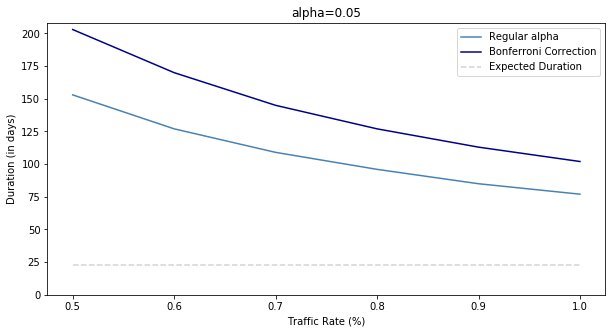

In [18]:
plot_duration_chart(alpha=0.05, flg_gross=True, flg_net=True, flg_ret=True)

As mentioned above, with the parameters defined so far the minimum time would be much larger than the expected, so some of the previous decision has to be reviewed in order to reduce the experiment duration like: 
* removing some metric and/or 
* reducing the confidence levels (that means increasing either $\alpha$ and/or $\beta$)

Let's check some scenarios with different parameters and metrics to decide which one would be a better approach to reduce the duration time

### Increasing alpha

Minimum duration: 60.0 days
Minimum duration with Bonferroni: 86.0 days


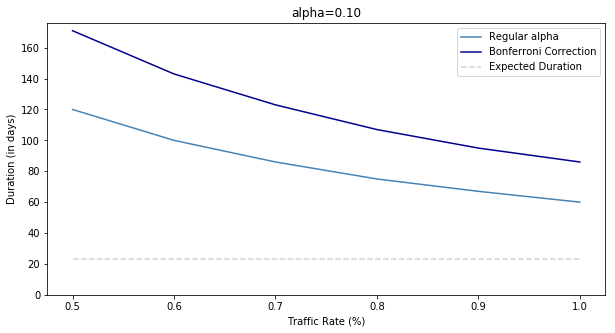

In [19]:
plot_duration_chart(alpha=0.1, flg_gross=True, flg_net=True, flg_ret=True)

Despite of the decrease of the minimum time it is still taking too long to finish the experiment, so only increasing alpha won't be enough to meet the the duration criteria.

### Removing some metrics

Some of the selected metrics are roughly measuring the same thing, as they came from the same users subscription funnel. Let's back to the metrics definitions:

* **Gross Conversion:** From all the users that clicked on the `Start Free Trial` button, how many of them actually completed the checkout process? (wider view of the funnel) 
* **Net Conversion:** This metric is similar to the Gross Conversion but instead of just measuring the users who passed from the checkout process, it is considering the users that has remained enrolled after the free-trial period which means that they've made at least one payment.
* **Retention:** From all the enrolled users in the free-trial period, how many of them actually moved foward to the paid version?

All of these metrics are important as they are measuring different aspects of the funnel, however the `retention` metric could be a good candidate to be removed from this analysis if we consider the logic below:

it is expected a higher `retention` rate in the experimental group as the users would know beforehand whether they have enough time available. So it could be filtering more engaged users on initial phases and consequently a big part of them will be willing to get to the end. That said, an increase in this metric could be a reflection of improvements of earlier steps of the funnel like Gross and Net conversions. Besides, `retention` is the metric with the highest estimated analytical variance thus it requires a larger sample size which direcly affects the experiment's duration.

Therefore the below chart shows how long it would take to run the experiment without the `retention` metric

### Removing Retention Metric

Minimum duration: 17.0 days
Minimum duration with Bonferroni: 21.0 days


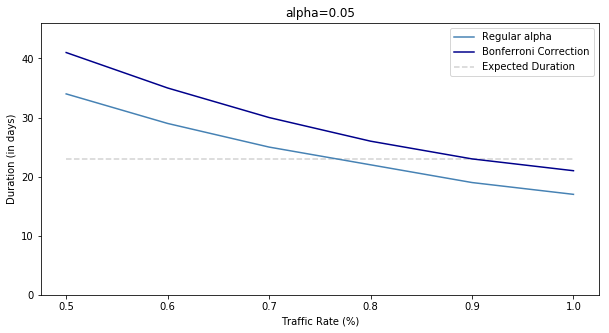

In [20]:
plot_duration_chart(alpha=0.05, flg_gross=True, flg_net=True, flg_ret=False)

With the same alpha and beta, without the `retention` metric the experiment could run within 17-21 days. That is a huge improvement with a minor (if any) information loss as it is still considering Gross and Net Conversion. 

Besides using Bonferroni correction for this highly correlated metrics is a conservative approach that could be too conservartive in some cases when there are many metrics to evaluate. 

Since there are only 2 metrics it would not be an issue.

### What about the traffic rate considerations?

The traffic rate decision depends on some factors like:

* Is this change risky? Maybe is safer (especially for big changes) not exposing 100% of your users to the experiment.
* Another experiment could be running at the same time, so to avoid the groups to overlap, only part of your users/traffic would be actually available.


> After removing `retention` with 90% of the traffic it still has an acceptable duration time.

In [21]:
result_bonf = generate_duration_data(alpha=0.05, 
                                     flg_gross=True, 
                                     flg_net=True, 
                                     flg_ret=False, 
                                     flg_bonf=True)

print(f'With 90% of the traffic and appying Bonferroni correction,\
the experiment duration would be {result_bonf[.9]} days')

With 90% of the traffic and appying Bonferroni correction,the experiment duration would be 23.0 days


## Experiment Analysis - Evaluating results

Udacity provided a dataset with real data (they've changed the numbers but not the aspects of the data) from an experiment they've run regarding this project and now it is time to evaluate the results and make a final recommendation to the business

In [22]:
df_control = pd.read_csv('../datasets/raw/Final Project Results - Control.csv')

In [23]:
df_control.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7723,687,134.0,70.0
1,"Sun, Oct 12",9102,779,147.0,70.0
2,"Mon, Oct 13",10511,909,167.0,95.0
3,"Tue, Oct 14",9871,836,156.0,105.0
4,"Wed, Oct 15",10014,837,163.0,64.0


In [24]:
df_exp = pd.read_csv('../datasets/raw/Final Project Results - Experiment.csv')

In [25]:
df_exp.head()

,Date,Pageviews,Clicks,Enrollments,Payments
0,"Sat, Oct 11",7716,686,105.0,34.0
1,"Sun, Oct 12",9288,785,116.0,91.0
2,"Mon, Oct 13",10480,884,145.0,79.0
3,"Tue, Oct 14",9867,827,138.0,92.0
4,"Wed, Oct 15",9793,832,140.0,94.0


In [26]:
df_a_b_test = df_control.merge(df_exp, on='Date', suffixes=['_cont', '_exp'])

In [27]:
df_a_b_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Pageviews_cont,37.0,9339.000000,740.239563,7434.0,8896.0,9420.0,9871.0,10667.0
Clicks_cont,37.0,766.972973,68.286767,632.0,708.0,759.0,825.0,909.0
Enrollments_cont,23.0,164.565217,29.977000,110.0,146.5,162.0,175.0,233.0
Payments_cont,23.0,88.391304,20.650202,56.0,70.0,91.0,102.5,128.0
Pageviews_exp,37.0,9315.135135,708.070781,7664.0,8881.0,9359.0,9737.0,10551.0
Clicks_exp,37.0,765.540541,64.578374,642.0,722.0,770.0,827.0,884.0
Enrollments_exp,23.0,148.826087,33.234227,94.0,127.0,142.0,172.0,213.0
Payments_exp,23.0,84.565217,23.060841,34.0,69.0,91.0,99.0,123.0


In [28]:
df_a_b_test['gross_conversion_cont'] = df_a_b_test['Enrollments_cont'] / df_a_b_test['Clicks_cont']
df_a_b_test['gross_conversion_exp'] = df_a_b_test['Enrollments_exp'] / df_a_b_test['Clicks_exp']

df_a_b_test['net_conversion_cont'] = df_a_b_test['Payments_cont'] / df_a_b_test['Clicks_cont']
df_a_b_test['net_conversion_exp'] = df_a_b_test['Payments_exp'] / df_a_b_test['Clicks_exp']

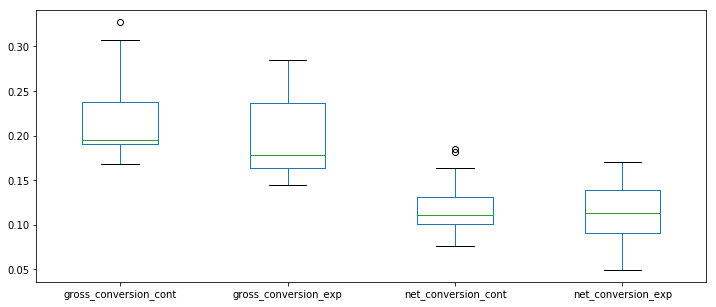

In [29]:
df_a_b_test[['gross_conversion_cont', 
             'gross_conversion_exp',
             'net_conversion_cont',
            'net_conversion_exp']].plot(kind='box',
                                        figsize=(12,5))

plt.show()

If the hypothesis (suggesting users a minimum availability time would make difference in the subscription process)is true, then the expected changes on these metrics are:

1. **Lower Gross Conversion** because it is filtering users on the free-trial enrollment process.
2. **Lower Net Conversion:** With less users enrolled in the free-trial due to the Gross Conversion reduction, it is expected to have even fewer users in the next step (the payment step) which is the numerator of this metric. So reducing it without changing the denominator, Net Conversion is also expected to be lower.

> **Observarions:**
1. Net Conversion might not be affected if the users that pay for the courses are already engaged, meaning that regardless of being informed about suggested availability, they would go to the payment step anyway.
2. If we still have the Retention metric in the evaluation process, we would expect it to be higher hoping that people that got in this phase of the funnel are more engaged than the control group because of the initial filter.

It seems that there is a difference between the control and experimental groups according to the plots above, but before drawing any conclusion, we need to make sure that the groups have been properly divided and the `invariant` metrics previously defined are not significantly different. Therefore next step is testing those things through a **Sanity Check**

In [30]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

## Sanity Check

Here are the metrics defined as `invariant` metrics:

* **Number of cookies (pageviews):** This is the experiment's `unity of diversion` so we have to be sure that they are evenly distributed between the groups.

* **Number of clicks:**: It should not be changed with the new feature and can be used as invariant metric in our sanity check.

* **click-through-probability:** This is the above metrics divided by each other and also should not be any different for both control and experimental group.

For metrics that are counts (such as pageviews and clicks) we can assume a Binomial Distribution with expected value of 0.5 in each group.

In the case that CTP (Click Through Probability) we have to build a confidence interval for this value and check whether the observed value is within this interval.

In [31]:
def sanity_check_count_diff(n_control, n_exp, N, confidence=0.95):
    
    expected = 0.5
    
    z_score = abs(np.round(stats.norm.ppf((1-confidence)/2),2))
    
    #Binomial_distribution SE formula
    SE = np.sqrt(expected*(1-expected) / N)

    margin_error = SE * z_score

    upper_limit = expected + margin_error
    lower_limit = expected - margin_error
    
    for test_n in [n_control, n_exp]:
        
        observed = test_n / N

        print('Observed {0:.4f}'.format(observed))

        if (observed >= lower_limit) & (observed <= upper_limit):
            print('Sanity check passed!')
        else:
            print('Sanity check failed!')

        print()
        
    
    print('Lower limit {0:.4f}'.format(lower_limit))
    print('Upper limit {0:.4f}'.format(upper_limit))


    return (lower_limit, upper_limit)
    

In [32]:
def binomial_significant_diff(n_a, n_b, N_a, N_b,alpha=0.05):
    
    p_a = n_a / N_a
    p_b = n_b / N_b
    
    d_hat = p_b - p_a
    
    z_score = abs(np.round(stats.norm.ppf((alpha)/2),2))
    
    pooled_prob = (n_a + n_b) / (N_a + N_b)
    
    se_pooled = np.sqrt(pooled_prob*(1-pooled_prob)*(1/N_a + 1/N_b))
    
    pooled_margin_error = z_score * se_pooled
    
    pooled_upper_limit = d_hat+pooled_margin_error
    pooled_lower_limit = d_hat-pooled_upper_limit
         
            
    print('Observed {0:.4f}'.format(d_hat))

    if (d_hat >= pooled_lower_limit) & (d_hat <= pooled_upper_limit):
        print('No significant difference found!')
    else:
        print('Significant difference found!')
        

    print()        
    
    print('alpha {0:.2f}'.format(alpha)) 
    print('Margin of error {0:.4f}'.format(pooled_margin_error))
    print('Lower limit {0:.4f}'.format(pooled_lower_limit))
    print('Upper limit {0:.4f}'.format(pooled_upper_limit))


    return (pooled_lower_limit, pooled_upper_limit)
    

### Pageviews

In [33]:
N_control = df_control['Pageviews'].sum()
N_exp = df_exp['Pageviews'].sum()
total_pagevies =  N_control + N_exp

In [34]:
N_control / total_pagevies

0.5006396668806133

In [35]:
N_exp / total_pagevies

0.4993603331193866

In [36]:
sanity_check_count_diff(N_control, N_exp, total_pagevies)

Observed 0.5006
Sanity check passed!

Observed 0.4994
Sanity check passed!

Lower limit 0.4988
Upper limit 0.5012


(0.49882039214902313, 0.5011796078509769)

### Clicks

In [37]:
N_control = df_control['Clicks'].sum()
N_exp = df_exp['Clicks'].sum()
total_clicks =  N_control + N_exp

In [38]:
N_control / total_clicks

0.5004673474066628

In [39]:
N_exp / total_clicks

0.49953265259333723

In [40]:
sanity_check_count_diff(N_control, N_exp, total_clicks)

Observed 0.5005
Sanity check passed!

Observed 0.4995
Sanity check passed!

Lower limit 0.4959
Upper limit 0.5041


(0.49588449572378945, 0.5041155042762105)

In these cases the observed difference is within the confidence intervals, so they passed the Sanity Check!

### Click-throught-probability

We want to check whether this metric has no significant difference between the control and experimental group

In [41]:
n_control = df_control['Clicks'].sum() 
N_control = df_control['Pageviews'].sum()

n_exp = df_exp['Clicks'].sum() 
N_exp = df_exp['Pageviews'].sum()

In [42]:
binomial_significant_diff(n_control, n_exp, N_control, N_exp)

Observed 0.0001
No significant difference found!

alpha 0.05
Margin of error 0.0013
Lower limit -0.0013
Upper limit 0.0014


(-0.0012956791986518956, 0.0013523062902388316)

As the confidence interval for the difference contains zero and also the observed difference is in the range, we can be confident that there is no significant difference between the two groups, as expected. So CTP passed the Sanity Check

## Evaluation Metrics

Now that the Sanity Check is OK, for each evaluation metric we have a confidence interval to check whether we had a significant and practical difference between the two groups

### Gross Conversion 
(enrollments / clicks)

Practical Significant = 1%

In [43]:
enrolls_a = df_control.dropna()['Enrollments'].sum()
enrolls_b = df_exp.dropna()['Enrollments'].sum()

clicks_a = df_control.dropna()['Clicks'].sum()
clicks_b = df_exp.dropna()['Clicks'].sum()

In [44]:
## bonferroni correction
bonferroni_alpha = 0.05 / 2
binomial_significant_diff(enrolls_a, 
                          enrolls_b, 
                          clicks_a, 
                          clicks_b, 
                          bonferroni_alpha)

Observed -0.0206
Significant difference found!

alpha 0.03
Margin of error 0.0098
Lower limit -0.0098
Upper limit -0.0108


(-0.009792552862906099, -0.010762321717455467)

If the observed difference is within the confidence interval we fail to reject the null hypothesis

#### Statistical Significance
Since zero is not in the confidence interval, so we are 95% confident that the difference between the groups $\hat{d}$ is greater than zero; 

#### Practical Significance
As the minimum difference of -0.01 is in the confidence interval, we are 95% confident this is also practically significant

### Net Conversion 
(Payments / Clicks)

Practical Significant Limit = 0.075%

In [45]:
payments_a = df_control.dropna()['Payments'].sum()
payments_b = df_exp.dropna()['Payments'].sum()

clicks_a = df_control.dropna()['Clicks'].sum()
clicks_b = df_exp.dropna()['Clicks'].sum()

In [46]:
## with bonferroni ajustment
bonferroni_alpha = 0.05 / 2
binomial_significant_diff(payments_a, payments_b, clicks_a, clicks_b, bonferroni_alpha)

Observed -0.0049
No significant difference found!

alpha 0.03
Margin of error 0.0077
Lower limit -0.0077
Upper limit 0.0028


(-0.00769245906896863, 0.0028187363944244623)

#### Statistical Significance
Since 0 is in the confidence interval, it is not statistically significant as we are 95% confident that zero is likley to happen on the difference between the two groups ($\hat{d}$) 

#### Practical Significance
d_min=-0.0075 is not in the confidence interval so there is no evidence with 95% confidence that it is practically significant.

### Considering the significant test results

The observed significant and practical differences between the control and experiment group has been confirmed only for the **Gross Conversion** and not for **Net Conversion** metric. 

in order to support these results we can confirm with a [sign test](https://www.statisticshowto.com/sign-test/) for both metrics and see if they match to the confidence interval results

## Sign Test

### Gross Conversion

In [47]:
df_sign_test = df_control[['Enrollments',
                           'Clicks',
                           'Date']].merge(df_exp[['Enrollments',
                                                  'Clicks',
                                                  'Date']],
                                          on='Date',
                                          suffixes=['_cont',
                                                    '_exp']).dropna().set_index('Date')

In [48]:
df_sign_test['Gross_A'] = df_sign_test['Enrollments_cont'] / df_sign_test['Clicks_cont'] 
df_sign_test['Gross_B'] = df_sign_test['Enrollments_exp'] / df_sign_test['Clicks_exp'] 

In [49]:
df_sign_test['flg_significant'] = df_sign_test['Gross_B'] > df_sign_test['Gross_A']

In [50]:
print('Number of success: {0}'.format(np.sum(df_sign_test['flg_significant'])))
print('Total number of cases: {0}'.format(len(df_sign_test)))

Number of success: 4
Total number of cases: 23


Using [this online calculator](https://www.graphpad.com/quickcalcs/binomial1.cfm) we can check whether this number of success cases is likely to happen in a Binomial Distribution

> It is also possible to use the `sanity_check_count_diff` method used in the sanity check and see the first test (test for the success rate) like this: `sanity_check_count_diff(#success,#failures,N)` 
If it pass the sanity check that means there is no significant difference

In [51]:
# Using the previous sanity check function
success_n = np.sum(df_sign_test['flg_significant'])
N = len(df_sign_test['flg_significant'])
failures_n = success_n - N
sanity_check_count_diff(success_n,failures_n,N)

Observed 0.1739
Sanity check failed!

Observed -0.8261
Sanity check failed!

Lower limit 0.2957
Upper limit 0.7043


(0.2956558742240667, 0.7043441257759333)

In [52]:
## Numbers from Online calculator
print('One tailed p_value', 0.0013)
print('Two tailed p_value', 0.0026)

One tailed p_value 0.0013
Two tailed p_value 0.0026


Since the two-tailed p_value is lower than alpha value of 0.05, according to the sign-test it is likely to have a significant difference for `Gross Conversion` and it matches to the hypothesis test results

### Net Conversion

In [53]:
df_sign_test = df_control[['Payments',
                           'Clicks',
                           'Date']].merge(df_exp[['Payments',
                                                  'Clicks',
                                                  'Date']],
                                          on='Date',
                                          suffixes=['_cont',
                                                    '_exp']).dropna().set_index('Date')

In [54]:
df_sign_test['Net_A'] = df_sign_test['Payments_cont'] / df_sign_test['Clicks_cont'] 
df_sign_test['Net_B'] = df_sign_test['Payments_exp'] / df_sign_test['Clicks_exp'] 

In [55]:
df_sign_test['flg_significant'] = df_sign_test['Net_B'] > df_sign_test['Net_A']

In [56]:
print('Number of success: {0}'.format(np.sum(df_sign_test['flg_significant'])))
print('Total number of cases: {0}'.format(len(df_sign_test)))

Number of success: 10
Total number of cases: 23


In [57]:
# Using the previous sanity check function
success_n = np.sum(df_sign_test['flg_significant'])
N = len(df_sign_test['flg_significant'])
failures_n = success_n - N
sanity_check_count_diff(success_n,failures_n,N)

Observed 0.4348
Sanity check passed!

Observed -0.5652
Sanity check failed!

Lower limit 0.2957
Upper limit 0.7043


(0.2956558742240667, 0.7043441257759333)

In [58]:
print('One tailed p_value', 0.3388)
print('Two tailed p_value', 0.6776)

One tailed p_value 0.3388
Two tailed p_value 0.6776


Since the p_values are really high, there is no evidence that the values are significantly different of each other so we have failed to reject the null hypothesis. This result also matches to our previous confidence interval and hypothesis test for this metric

## Final Recommendation

Here is the summary of the results evaluated:

<table align='left'>
<tr><td><b> Metric </b></td><td> <b>Expected</b></td><td><b>Observed</b></td><td><b> Statistical Significant?</b></td><td><b> Practical Significant?</b></td></tr>
<tr><td>Gross Conversion</td><td>Lower in the Experimental Group</td><td>Lower in the Experimental Group</td><td>Yes</td><td>Yes</td></tr>
<tr><td>Net Conversion</td><td>Lower/No change in the Experimental Group</td><td>No change in the Experimental Group</td><td>No</td><td>No</td></tr>
</table>

We have a statistical and practical significance for `Gross Conversion` in the expected direction (negative direction) and no evidence of a significant difference in `Net Conversion`. 

As mentioned before, the `Net Conversion` could present a non-significant difference if this new feature has no effect on engaged users (as they would pay for the course either way) and for further analysis with more data available, it would be good to test the `retention` to support this hypothesis and/or additional experiments restricting non-engaged users (if it's possible)

### With the results of this analysis I would recommend launching this change!!

With this implemented Udacity could focus on converting students from free-courses to the paid versions in addition to offer premium services (like coaching) only for users that are more likely to pay, as this change could refine the users that pass to the payment step.

# Conclusion

This is a great course that address detailed and useful information about planning, executing and evaluating experiments. Being able to follow these steps properly could make the business/product decisions more accurate moving from "I think" to "I know". 

There are many techniques and statistical aspects covered on this course but I think the key point (and maybe the hardest one) is learning how to frame your business questions as A/B tests and be confident about the answers to make an accurate data-driven decision.

## Follow-Up Experiment: How to Reduce Early Cancellations

A good start point could be trying to understand the main reasons for cancellations, using for example a check-box question before users confirm the cancellation with some general reasons like:

* Price
* Content of Interest
* Methodology
* Difficulty level
* etc...

With this data in hands, an exploratory data analysis could be performed, breaking down these data into smaller pieces like subjects of the course, categories, country, user's engagement, reported time availability and so on... so the business would be able to have some intuitions/insights about the cancellations based on real data and the next experiments could be more focused on the main points previously identified in the exploratory analysis. 

**For example:**

If **price** was one of the main reasons, maybe a <u>performance-related campaign</u> with some progressive discounts for good students would help to avoid early cancellations like: *50% discounts if the user finishes the course within 6 months*. 

Then we could run an experiment to check whether the users who had a progressive discount offer are less likley to cancel it in advance.

Therefore with **actions plans** defined, the experiments and metrics will depend on the business cases, but the process might be very similar to the followed throughout this document.

### References

#### Course:

* https://www.udacity.com/course/ab-testing--ud257

#### Online calculators:

* https://www.evanmiller.org/ab-testing/sample-size.html
* https://www.graphpad.com/quickcalcs/binomial1.cfm

## Appendix 1 - Bayesian Inference

After taking this course I started to go deeper into `Bayesian Analysis` to learn how different it is from the `Frequentist approach` (which is the one used throughout this project) and I think it is very interesting approach considering the way we can interpret the results more naturally when we think about the probability concept.

I'm not going further on Bayesian aspects as I haven't acquired enough theoretical basis yet to discuss such a delicate subject among statisticians, but I will be using `PyMC3` and the **Posterior Distributions** to compare both of groups A and B outcomes.

> Despite of Bayesian approach enables to include in our models some prior information we might have about the data, I would follow with a non-informative prior simulating the frequentist approach we've used

In [59]:
import pymc3 as pm
import arviz as az

/Users/leandrocorrea/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Gross Conversion

In [60]:
enrolls_a = df_control.dropna()['Enrollments'].sum()
enrolls_b = df_exp.dropna()['Enrollments'].sum()

clicks_a = df_control.dropna()['Clicks'].sum()
clicks_b = df_exp.dropna()['Clicks'].sum()

In [61]:
with pm.Model() as model:
    p_a = pm.Uniform('p_a', lower=0, upper=1)
    p_b = pm.Uniform('p_b', lower=0, upper=1)
    
    delta = pm.Deterministic('delta', p_b - p_a)
    
    obs_a = pm.Binomial('obs_a', p=p_a, n=clicks_a, observed=enrolls_a)
    obs_b = pm.Binomial('obs_b', p=p_b, n=clicks_b, observed=enrolls_b)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(20000, step=step, start=start)
    burned_trace=trace[1000:]

logp = -6,276.4, ||grad|| = 7,123.7: 100%|██████████| 10/10 [00:00<00:00, 1804.31it/s]
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_b]
>Metropolis: [p_a]
Sampling 2 chains, 0 divergences: 100%|██████████| 41000/41000 [00:13<00:00, 3104.77draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [62]:
p_A_samples = burned_trace["p_a"]
p_B_samples = burned_trace["p_b"]
delta_samples = burned_trace["delta"]

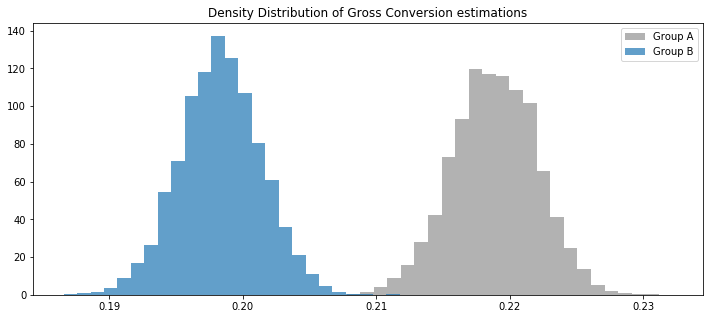

In [63]:
plt.figure(figsize=(12,5))
plt.hist(p_A_samples, 
         histtype='stepfilled',
         bins=25, 
         alpha=0.6, 
         density=True, 
         color='grey', 
         label='Group A')
plt.hist(p_B_samples, 
         histtype='stepfilled', 
         bins=25, 
         alpha=0.7, 
         density=True,
        label='Group B',)
plt.title('Density Distribution of Gross Conversion estimations')
plt.legend()
plt.show()

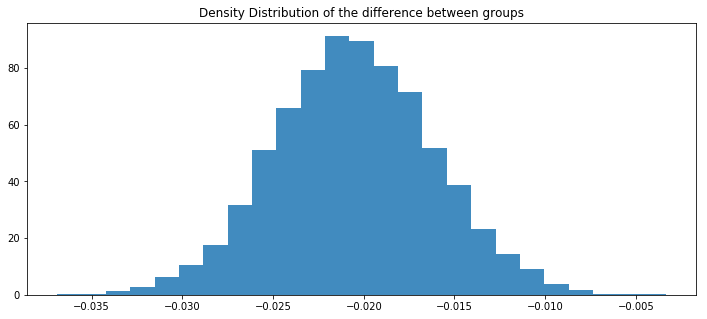

In [64]:
plt.figure(figsize=(12,5))
plt.hist(delta_samples, 
         histtype='stepfilled', 
         bins=25, 
         alpha=0.85, 
         density=True,
        label='Difference')
plt.title('Density Distribution of the difference between groups')
plt.show()

In [65]:
az.summary(burned_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p_a,0.219,0.003,0.213,0.225,0.0,0.0,3322.0,3322.0,3330.0,3316.0,1.0
p_b,0.198,0.003,0.193,0.205,0.0,0.0,3042.0,3042.0,3045.0,3246.0,1.0
delta,-0.021,0.004,-0.029,-0.012,0.0,0.0,3267.0,3245.0,3260.0,4390.0,1.0


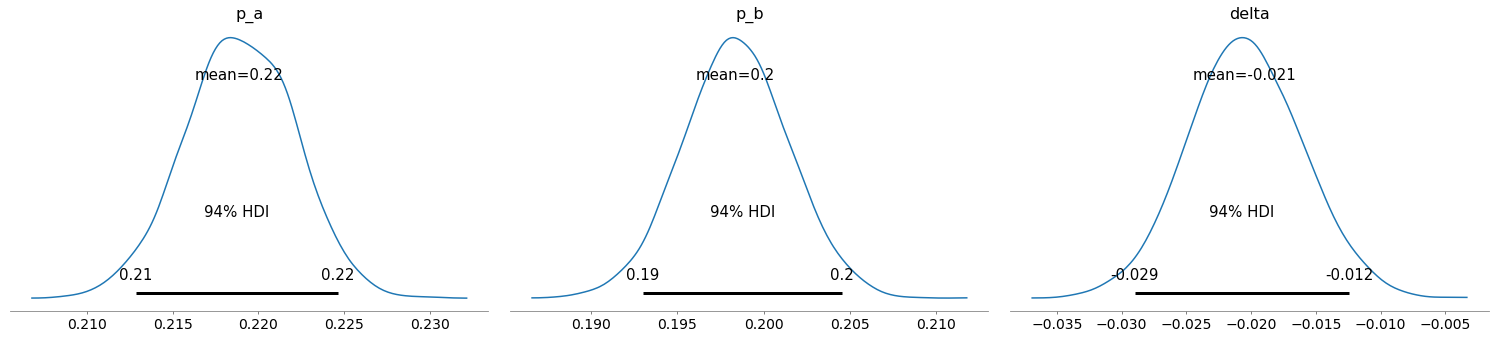

In [66]:
az.plot_posterior(burned_trace)
plt.show()

According to the `delta` HDI (Highest Density Interval) we could be 94% **certain** that the difference is between -0.029 and -0.012 and no difference is very unlikely to happen (delta = 0), therefore it is another evidence from another approach that we observed a sifgnificant difference for `Gross Conversion`

That is the main difference in interpretation comparing Frequentist x Bayesian: since the latter is showing a sort of an **uncertanity** level, the former is measuring some kind of **repeatability** level (frequency of events)

In frequentist approach we are 95% confident that if we run an experiment N times and compute a confidence interval for each one, the true value will be present in (1-$\alpha$) of the times (in this case we used alpha = 0.05), so in other words here we are fixing the parameter to be estimated and varying the intervals

Unlike the frequetist, in Bayesian approach the interval is fixed and what actually varys is the certainty level about the values the metric could be assumed, meaning that the probability of `delta` being in HDI limits is 94%. 

> Notice that we are not talking about repeating this experiment N times but the **certainty** level of true value of this parameter.

### Net Conversion

In [67]:
payments_a = df_control.dropna()['Payments'].sum()
payments_b = df_exp.dropna()['Payments'].sum()

clicks_a = df_control.dropna()['Clicks'].sum()
clicks_b = df_exp.dropna()['Clicks'].sum()

In [68]:
with pm.Model() as model:
    p_a = pm.Uniform('p_a', lower=0, upper=1)
    p_b = pm.Uniform('p_b', lower=0, upper=1)
    
    delta = pm.Deterministic('delta', p_b - p_a)
    
    obs_a = pm.Binomial('obs_a', p=p_a, n=clicks_a, observed=payments_a)
    obs_b = pm.Binomial('obs_b', p=p_b, n=clicks_b, observed=payments_b)
    
    step = pm.Metropolis()
    start = pm.find_MAP()
    trace = pm.sample(20000, step=step, start=start)
    burned_trace=trace[1000:]

logp = -9.3108, ||grad|| = 1.3949e-05: 100%|██████████| 16/16 [00:00<00:00, 1439.12it/s]  
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_b]
>Metropolis: [p_a]
Sampling 2 chains, 0 divergences: 100%|██████████| 41000/41000 [00:12<00:00, 3224.61draws/s]
The number of effective samples is smaller than 10% for some parameters.


In [69]:
p_A_samples = burned_trace["p_a"]
p_B_samples = burned_trace["p_b"]
delta_samples = burned_trace["delta"]

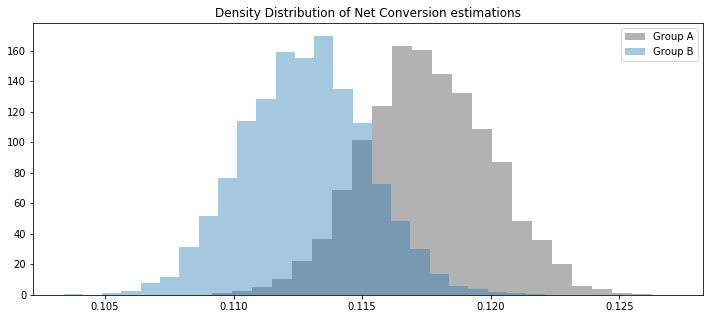

In [70]:
plt.figure(figsize=(12,5))
plt.hist(p_A_samples, 
         histtype='stepfilled',
         bins=25, 
         alpha=0.6, 
         density=True, 
         color='grey', 
         label='Group A')
plt.hist(p_B_samples, 
         histtype='stepfilled', 
         bins=25, 
         alpha=0.4, 
         density=True,
        label='Group B')
plt.title('Density Distribution of Net Conversion estimations')
plt.legend()
plt.show()

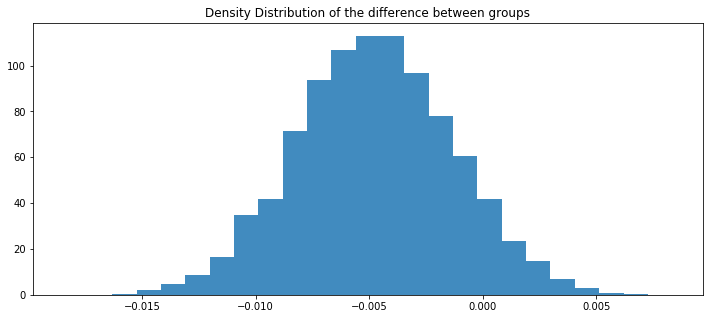

In [71]:
plt.figure(figsize=(12,5))
plt.hist(delta_samples, 
         histtype='stepfilled', 
         bins=25, 
         alpha=0.85, 
         density=True,
        label='Difference')
plt.title('Density Distribution of the difference between groups')
plt.show()

In [72]:
az.summary(burned_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
p_a,0.118,0.002,0.113,0.123,0.0,0.0,2198.0,2198.0,2211.0,2145.0,1.0
p_b,0.113,0.002,0.108,0.117,0.0,0.0,2635.0,2621.0,2633.0,3432.0,1.0
delta,-0.005,0.003,-0.011,0.002,0.0,0.0,2539.0,2539.0,2545.0,3291.0,1.0


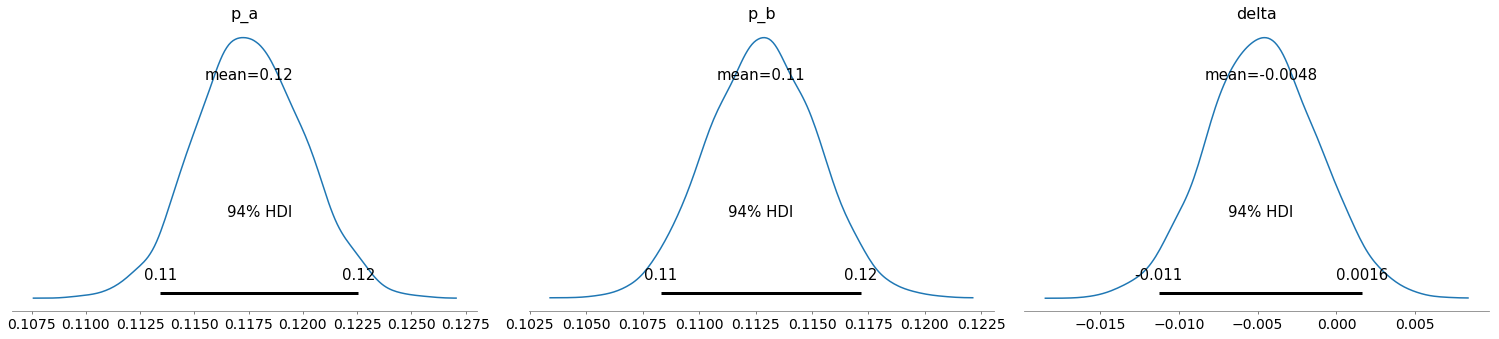

In [73]:
az.plot_posterior(burned_trace)
plt.show()

In the frequentist approach we've seen that `Net Conversion` has no evidence to conclude a significant difference so as in the Bayesian. Despite it seems to have **some** difference (especially when we look at the distributions side by side) it is not strong enough to say it is significantly different, as the HDI contains zero in its range. 

> It is like to say: "It might have some difference in a positive side or negative side or even no difference at all, meaning that B could be better, worse or equal to A"

The above sentence is not exactly transmitting confidence to the listeners right? Therefore we wouldn't be able to safely conclude that in fact there is some difference, so like in the frequentist approach with the confidence interval, the HDI is also failling to reject the hypothesis for this metric.